# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [380]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [381]:
websites = pd.read_csv('./data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [382]:
# Your code here
websites.sample(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
369,B0_646,37,8,utf-8,nginx/1.4.3,135444.0,US,NY,2/11/1996 0:00,26/11/2014 0:00,...,6,7,5207,70,88,247488,5345,70,2.0,0
323,B0_197,36,8,ISO-8859-1,nginx,NaN,CN,shandong,8/09/2003 0:00,24/10/2016 0:00,...,2,8,1432,20,27,2113,1572,20,2.0,0
864,B0_1243,49,11,ISO-8859-1,NaN,1819.0,US,CA,2/11/2002 0:00,2/02/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
1446,B0_404,75,14,utf-8,GSE,NaN,US,CA,15/09/1997 0:00,20/07/2011 0:00,...,18,14,4631,49,42,12921,5353,49,10.0,0
792,B0_153,47,10,UTF-8,NaN,NaN,US,WA,1/06/2001 0:00,17/05/2016 0:00,...,28,3,4948,40,35,19634,5516,40,8.0,0
1408,B0_24,72,12,UTF-8,Server,NaN,US,NV,1/11/1994 0:00,30/04/2014 0:00,...,21,8,3862,33,33,11108,4290,33,6.0,0
557,B0_1283,41,8,utf-8,nginx,NaN,US,Oregon,30/08/2000 0:00,16/08/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0
1001,B0_862,53,10,us-ascii,Microsoft-HTTPAPI/2.0,324.0,United Kingdom,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
1056,B0_502,55,10,UTF-8,mw2239.codfw.wmnet,NaN,US,CA,13/01/2001 0:12,12/12/2015 10:16,...,18,4,3101,31,30,13795,3405,31,4.0,0
1102,B0_1414,57,9,ISO-8859-1,NaN,NaN,US,CA,29/03/1997 0:00,29/11/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0


In [383]:
# Your comment here
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [384]:
websites.nunique()

URL                          1781
URL_LENGTH                    142
NUMBER_SPECIAL_CHARACTERS      31
CHARSET                         8
SERVER                        238
CONTENT_LENGTH                637
WHOIS_COUNTRY                  48
WHOIS_STATEPRO                181
WHOIS_REGDATE                 890
WHOIS_UPDATED_DATE            593
TCP_CONVERSATION_EXCHANGE     103
DIST_REMOTE_TCP_PORT           66
REMOTE_IPS                     18
APP_BYTES                     825
SOURCE_APP_PACKETS            113
REMOTE_APP_PACKETS            116
SOURCE_APP_BYTES              885
REMOTE_APP_BYTES              822
APP_PACKETS                   113
DNS_QUERY_TIMES                10
Type                            2
dtype: int64

In [385]:
# 1. All columns except Type are features.
# 2 .The Type column is the target. 0 means benign, 1 means malicious.
# 3. Yes. Columns: CHARSET, WHOIS_REGDATE, WHOIS_REGDATE

# Convert date columns to datetime and extract useful features
websites['WHOIS_REGDATE'] = pd.to_datetime(websites['WHOIS_REGDATE'], errors='coerce')
websites['WHOIS_REGDATE_DATE'] = pd.to_datetime(websites['WHOIS_UPDATED_DATE'], errors='coerce')

websites['REGDATE_DAYS'] = (
    websites['WHOIS_REGDATE'] - pd.Timestamp("1970-01-01")
) // pd.Timedelta(days=1)

websites['UPDATED_DAYS'] = (
    websites['WHOIS_REGDATE_DATE'] - pd.Timestamp("1970-01-01")
) // pd.Timedelta(days=1)

websites['DOMAIN_AGE_DAYS'] =  websites['UPDATED_DAYS'] - websites['REGDATE_DAYS']


#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [386]:
# Your code here
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   URL                        1781 non-null   object        
 1   URL_LENGTH                 1781 non-null   int64         
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64         
 3   CHARSET                    1774 non-null   object        
 4   SERVER                     1605 non-null   object        
 5   CONTENT_LENGTH             969 non-null    float64       
 6   WHOIS_COUNTRY              1475 non-null   object        
 7   WHOIS_STATEPRO             1419 non-null   object        
 8   WHOIS_REGDATE              576 non-null    datetime64[ns]
 9   WHOIS_UPDATED_DATE         1642 non-null   object        
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64         
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64         
 12  REMOTE

In [387]:
# Your comment here
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   URL                        1781 non-null   object        
 1   URL_LENGTH                 1781 non-null   int64         
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64         
 3   CHARSET                    1774 non-null   object        
 4   SERVER                     1605 non-null   object        
 5   CONTENT_LENGTH             969 non-null    float64       
 6   WHOIS_COUNTRY              1475 non-null   object        
 7   WHOIS_STATEPRO             1419 non-null   object        
 8   WHOIS_REGDATE              576 non-null    datetime64[ns]
 9   WHOIS_UPDATED_DATE         1642 non-null   object        
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64         
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64         
 12  REMOTE

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

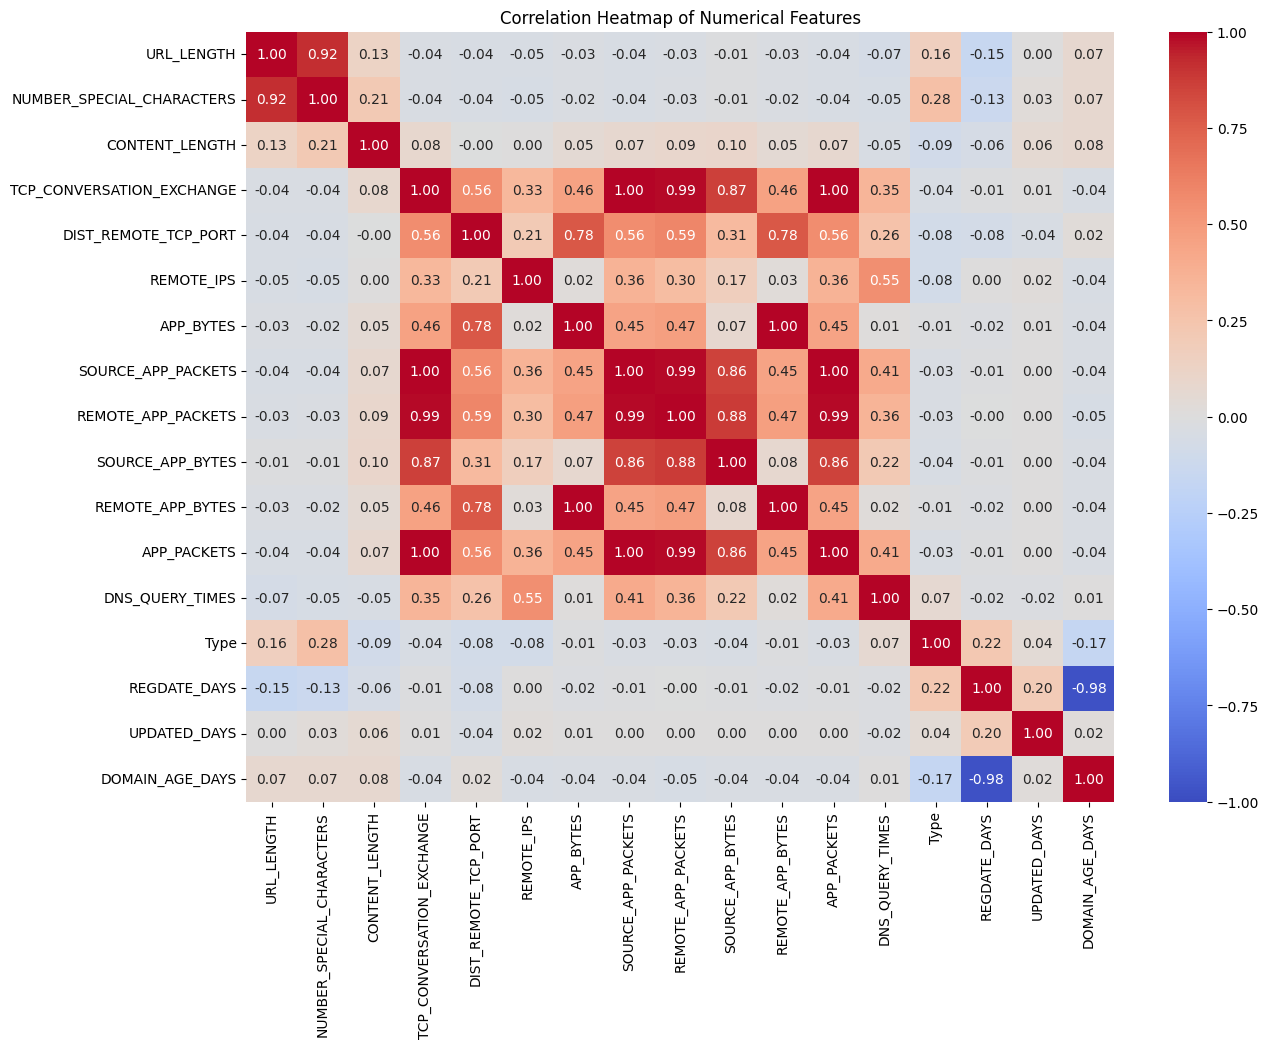

In [388]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_cols = websites.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = websites[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [389]:
np.fill_diagonal(corr_matrix.values, 0)

high_corr_pairs = (
    corr_matrix.stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature A', 'level_1': 'Feature B', 0: 'Correlation'})
)
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.9].sort_values(by='Correlation', ascending=False)

print(high_corr_pairs)

                     Feature A                  Feature B  Correlation
130         SOURCE_APP_PACKETS                APP_PACKETS     1.000000
194                APP_PACKETS         SOURCE_APP_PACKETS     1.000000
112                  APP_BYTES           REMOTE_APP_BYTES     0.999992
176           REMOTE_APP_BYTES                  APP_BYTES     0.999992
58   TCP_CONVERSATION_EXCHANGE         SOURCE_APP_PACKETS     0.997796
62   TCP_CONVERSATION_EXCHANGE                APP_PACKETS     0.997796
122         SOURCE_APP_PACKETS  TCP_CONVERSATION_EXCHANGE     0.997796
190                APP_PACKETS  TCP_CONVERSATION_EXCHANGE     0.997796
59   TCP_CONVERSATION_EXCHANGE         REMOTE_APP_PACKETS     0.990848
139         REMOTE_APP_PACKETS  TCP_CONVERSATION_EXCHANGE     0.990848
147         REMOTE_APP_PACKETS                APP_PACKETS     0.989285
195                APP_PACKETS         REMOTE_APP_PACKETS     0.989285
127         SOURCE_APP_PACKETS         REMOTE_APP_PACKETS     0.989285
143   

In [390]:
websites.drop(columns=[
    'APP_PACKETS',
    'REMOTE_APP_PACKETS',
    'TCP_CONVERSATION_EXCHANGE',
    'APP_BYTES',
    'REMOTE_APP_BYTES',
    'NUMBER_SPECIAL_CHARACTERS'
], inplace=True)


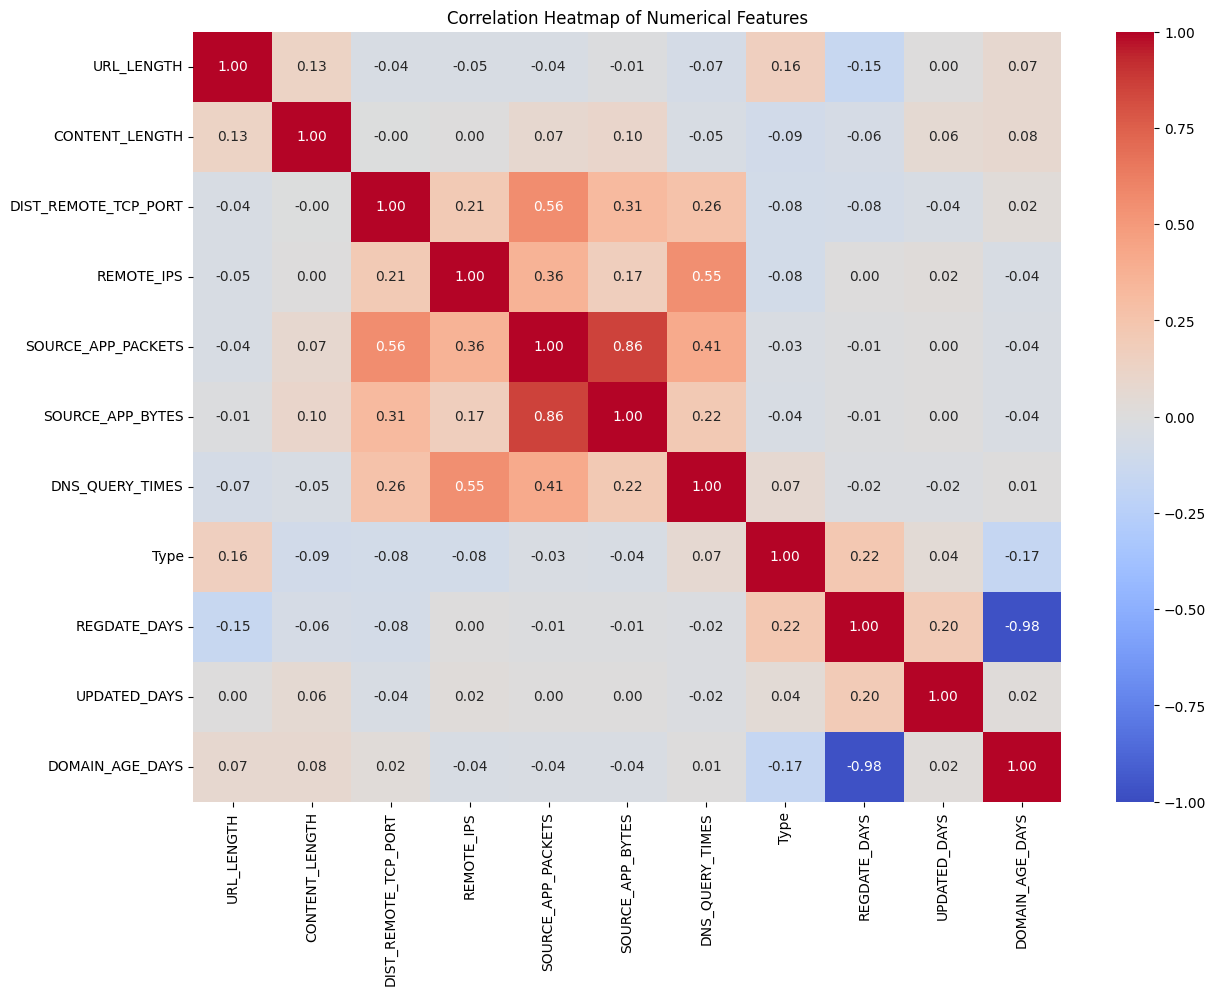

In [391]:
numeric_cols = websites.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = websites[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [392]:
corr_matrix = websites[numeric_cols].corr()
np.fill_diagonal(corr_matrix.values, 0)

high_corr_pairs = (
    corr_matrix.stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature A', 'level_1': 'Feature B', 0: 'Correlation'})
)
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.9].sort_values(by='Correlation', ascending=False)

print(high_corr_pairs)

Empty DataFrame
Columns: [Feature A, Feature B, Correlation]
Index: []


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [393]:
# Your code here
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   URL                   1781 non-null   object        
 1   URL_LENGTH            1781 non-null   int64         
 2   CHARSET               1774 non-null   object        
 3   SERVER                1605 non-null   object        
 4   CONTENT_LENGTH        969 non-null    float64       
 5   WHOIS_COUNTRY         1475 non-null   object        
 6   WHOIS_STATEPRO        1419 non-null   object        
 7   WHOIS_REGDATE         576 non-null    datetime64[ns]
 8   WHOIS_UPDATED_DATE    1642 non-null   object        
 9   DIST_REMOTE_TCP_PORT  1781 non-null   int64         
 10  REMOTE_IPS            1781 non-null   int64         
 11  SOURCE_APP_PACKETS    1781 non-null   int64         
 12  SOURCE_APP_BYTES      1781 non-null   int64         
 13  DNS_QUERY_TIMES   

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [394]:
# Your code here
websites.drop(columns=[
    'CONTENT_LENGTH',
    'WHOIS_REGDATE',
    'WHOIS_REGDATE_DATE',
    'WHOIS_UPDATED_DATE',
    'REGDATE_DAYS',
    'UPDATED_DAYS',
    'DOMAIN_AGE_DAYS'
], inplace=True)


In [395]:
# Your comment here
websites.dropna(inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [396]:
# Examine missing values in each column
websites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1260 entries, 3 to 1780
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   1260 non-null   object 
 1   URL_LENGTH            1260 non-null   int64  
 2   CHARSET               1260 non-null   object 
 3   SERVER                1260 non-null   object 
 4   WHOIS_COUNTRY         1260 non-null   object 
 5   WHOIS_STATEPRO        1260 non-null   object 
 6   DIST_REMOTE_TCP_PORT  1260 non-null   int64  
 7   REMOTE_IPS            1260 non-null   int64  
 8   SOURCE_APP_PACKETS    1260 non-null   int64  
 9   SOURCE_APP_BYTES      1260 non-null   int64  
 10  DNS_QUERY_TIMES       1260 non-null   float64
 11  Type                  1260 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 128.0+ KB


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [397]:
# Your code here
websites["WHOIS_COUNTRY"].value_counts()



WHOIS_COUNTRY
US                958
CA                 75
ES                 63
AU                 26
PA                 21
GB                 13
JP                 10
IN                 10
CZ                  8
CN                  8
NL                  5
CH                  5
[u'GB'; u'UK']      5
BS                  4
UK                  4
ru                  4
AT                  4
KY                  3
PH                  3
SC                  3
us                  3
HK                  2
UA                  2
UY                  2
KG                  2
SI                  2
RU                  2
TR                  1
UG                  1
PK                  1
IL                  1
DE                  1
SE                  1
IT                  1
NO                  1
BE                  1
BY                  1
AE                  1
IE                  1
LV                  1
Name: count, dtype: int64

In [398]:
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].astype(str).str.strip()
''' 
country_map = {
    "[U'GB'; U'UK']": "GB",
    "UK": "GB"
}
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace(country_map)
'''

def clean_country(value):
    value = str(value).strip().upper()
    if "GB" in value and "UK" in value:
        return "GB"
    return value

websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(clean_country)


websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].str.upper()


websites['WHOIS_COUNTRY'].value_counts()

WHOIS_COUNTRY
US    961
CA     75
ES     63
AU     26
PA     21
GB     18
JP     10
IN     10
CN      8
CZ      8
RU      6
NL      5
CH      5
BS      4
AT      4
UK      4
KY      3
PH      3
SC      3
UY      2
UA      2
KG      2
HK      2
SI      2
TR      1
PK      1
IL      1
DE      1
SE      1
IT      1
NO      1
BE      1
BY      1
AE      1
IE      1
UG      1
LV      1
Name: count, dtype: int64

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

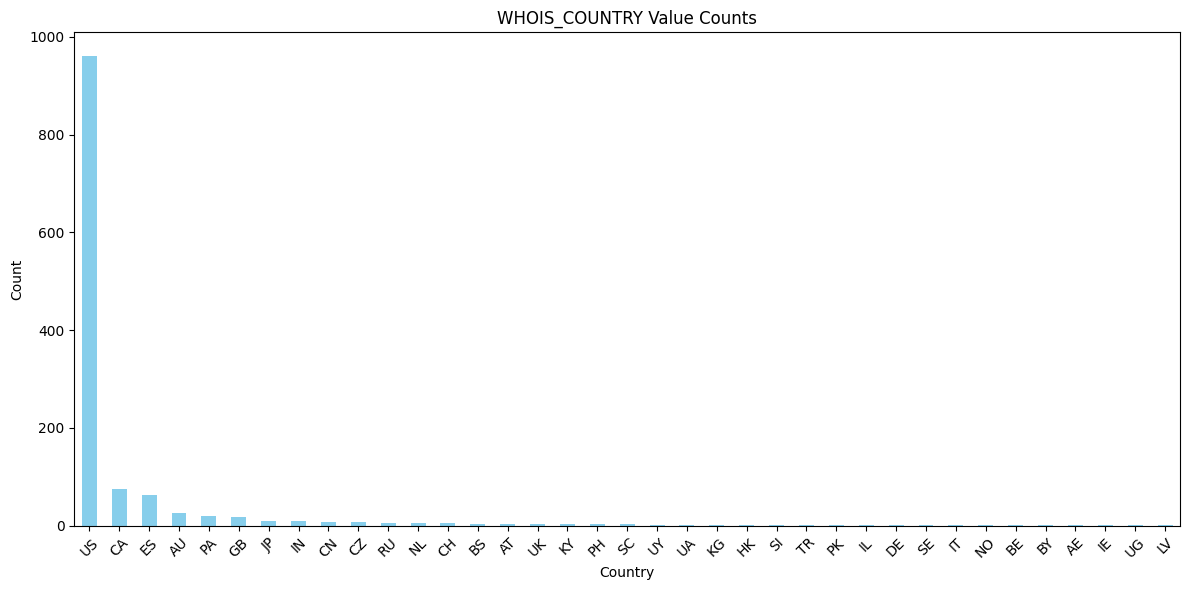

In [399]:
# Your code here
country_counts = websites['WHOIS_COUNTRY'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('WHOIS_COUNTRY Value Counts')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [400]:
# Your code here
# Get the top 10 countries by frequency
top_10 = websites['WHOIS_COUNTRY'].value_counts().nlargest(10).index

# Create a new column with relabeled countries
websites['WHOIS_COUNTRY_GROUPED'] = websites['WHOIS_COUNTRY'].apply(
    lambda x: x if x in top_10 else 'Other'
)


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [401]:
# Your code here
websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_COUNTRY'], inplace=True)


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [402]:
# Your code here
websites.dtypes


URL                       object
URL_LENGTH                 int64
CHARSET                   object
SERVER                    object
DIST_REMOTE_TCP_PORT       int64
REMOTE_IPS                 int64
SOURCE_APP_PACKETS         int64
SOURCE_APP_BYTES           int64
DNS_QUERY_TIMES          float64
Type                       int64
WHOIS_COUNTRY_GROUPED     object
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [403]:
# Your code here
websites.drop(columns=["URL"], inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [404]:
# Your code here
websites["CHARSET"].value_counts()

CHARSET
UTF-8           521
utf-8           280
ISO-8859-1      275
us-ascii         98
iso-8859-1       84
windows-1251      1
windows-1252      1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [405]:
# Your code here
websites["SERVER"].value_counts()


SERVER
Apache                                                                                312
nginx                                                                                 144
cloudflare-nginx                                                                       80
Microsoft-HTTPAPI/2.0                                                                  76
GSE                                                                                    49
                                                                                     ... 
Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40      1
mw2114.codfw.wmnet                                                                      1
mw2199.codfw.wmnet                                                                      1
fbs                                                                                     1
Apache/2.2.16 (Debian)                                                                  1
Nam

![Think Hard](./images/think-hard.jpg)

In [406]:
# Your comment here


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [407]:
# Your code here
# Define a function to relabel server types
def relabel_server(server):
    server = str(server).lower()  # Convert to lowercase for consistent matching
    if 'microsoft' in server:
        return 'Microsoft'
    elif 'apache' in server:
        return 'Apache'
    elif 'nginx' in server:
        return 'nginx'
    else:
        return 'Other'

# Apply the function to the SERVER column
websites['SERVER'] = websites['SERVER'].apply(relabel_server)



In [408]:
# Count `SERVER` value counts here
websites['SERVER'].value_counts()

SERVER
Apache       493
nginx        323
Other        299
Microsoft    145
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [409]:
# Your code here
website_dummy = pd.get_dummies(websites, columns=['CHARSET', 'SERVER', 'WHOIS_COUNTRY_GROUPED'])



Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [410]:
# Your code here
website_dummy.dtypes



URL_LENGTH                       int64
DIST_REMOTE_TCP_PORT             int64
REMOTE_IPS                       int64
SOURCE_APP_PACKETS               int64
SOURCE_APP_BYTES                 int64
DNS_QUERY_TIMES                float64
Type                             int64
CHARSET_ISO-8859-1                bool
CHARSET_UTF-8                     bool
CHARSET_iso-8859-1                bool
CHARSET_us-ascii                  bool
CHARSET_utf-8                     bool
CHARSET_windows-1251              bool
CHARSET_windows-1252              bool
SERVER_Apache                     bool
SERVER_Microsoft                  bool
SERVER_Other                      bool
SERVER_nginx                      bool
WHOIS_COUNTRY_GROUPED_AU          bool
WHOIS_COUNTRY_GROUPED_CA          bool
WHOIS_COUNTRY_GROUPED_CN          bool
WHOIS_COUNTRY_GROUPED_CZ          bool
WHOIS_COUNTRY_GROUPED_ES          bool
WHOIS_COUNTRY_GROUPED_GB          bool
WHOIS_COUNTRY_GROUPED_IN          bool
WHOIS_COUNTRY_GROUPED_JP 

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [411]:
from sklearn.model_selection import train_test_split

# Your code here:
X = website_dummy.drop('Type', axis=1)
y = website_dummy['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [412]:
# Your code here:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [413]:
# Your code here:
log_reg.fit(X_train, y_train)


/Users/sergej/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [414]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = log_reg.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[221   5]
 [ 10  16]]

Accuracy Score:
0.9404761904761905


What are your thoughts on the performance of the model? Write your conclusions below.

In [415]:
# Your conclusions here:

# The model shows high accuracy (94%) and few false positives. However, the false 10 negatives could be problematic, considering that each malicious website can lead to unpleasant consequences.

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [416]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

knn3 = KNeighborsClassifier(n_neighbors=3)

knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [417]:
# Your code here:
y_pred_knn3 = knn3.predict(X_test)

print("Confusion Matrix (KNN):")
print(confusion_matrix(y_test, y_pred_knn3))

print("\nAccuracy Score (KNN):")
print(accuracy_score(y_test, y_pred_knn3))



Confusion Matrix (KNN):
[[219   7]
 [ 11  15]]

Accuracy Score (KNN):
0.9285714285714286


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [418]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

knn5 = KNeighborsClassifier(n_neighbors=5)

knn5.fit(X_train, y_train)

y_pred_knn5 = knn5.predict(X_test)

print("Confusion Matrix (KNN):")
print(confusion_matrix(y_test, y_pred_knn5))

print("\nAccuracy Score (KNN):")
print(accuracy_score(y_test, y_pred_knn5))


Confusion Matrix (KNN):
[[217   9]
 [ 11  15]]

Accuracy Score (KNN):
0.9206349206349206


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [419]:
# Your conclusions here:

# Based on the evaluation metrics, the logistic regression model outperforms both KNN models with higher accuracy (94.05%) and fewer false positives and false negatives. This suggests that logistic regression is the most reliable choice for this dataset.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [420]:
# Your code here
from sklearn.preprocessing import RobustScaler


numeric_features = [
    'URL_LENGTH',
    'DIST_REMOTE_TCP_PORT',
    'REMOTE_IPS',
    'SOURCE_APP_PACKETS',
    'SOURCE_APP_BYTES',
    'DNS_QUERY_TIMES'
]

scaler = RobustScaler()

website_dummy_scaled = website_dummy.copy()
website_dummy_scaled[numeric_features] = scaler.fit_transform(website_dummy[numeric_features])


In [421]:
X = website_dummy_scaled.drop('Type', axis=1)
y = website_dummy_scaled['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[223   3]
 [ 11  15]]

Accuracy Score:
0.9444444444444444


In [422]:
# After applying Robust Scaling to the numeric features, the logistic regression model achieved a higher accuracy of 94.44%. The number of false positives decreased from 5 to 3, indicating improved precision. This suggests that scaling helped enhance the model’s overall performance.